# Native Space Comparison
C. Heiser, 2019

---
__The purpose of this notebook is to evaluate priming dimensionality reduction techniques with PCA versus using 500-gene space for their ability to preserve Euclidean structure of high-dimensional datasets.__  
  
To benchmark these techniques, we are using two single-cell RNAseq datasets:
* From [__Macosko, *et al* (2015)__](https://www.ncbi.nlm.nih.gov/pubmed/26000488), the mouse retina scRNA-seq data generated using DropSeq: [GSM1626793](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM1626793)
* From [__Herring, *et al* (2018)__](https://www.ncbi.nlm.nih.gov/pubmed/29153838), the WT mouse colon scRNA-seq data generated using inDrops: [GSM2743164](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM2743164)  
  
The first set should be __discrete__, containing highly separable cell populations from the mouse retina, where the latter will be __continuous__, representing a continuum of branching cell states in the gut epithelium.  
  
Both datasets have been __preprocessed and feature-selected__ to allow for direct input to downstream dimensionality reduction algorithms (rather than first performing PCA to limit dimensional input). These methods are shown in [`dev/QC.ipynb`](dev/QC.ipynb).

In [1]:
import sys
sys.path.append('../')
from fcc_utils import *
%matplotlib inline

---
First, read in retina and colon datasets with all genes present

In [2]:
# read in Macosko retina data
retina = sc.read_text('../inputs/GSM1626793_P14Retina_1.digital_expression_filtered_CH.tsv.gz', delimiter='\t')
# read in Herring colon data
colon = sc.read_text('../inputs/GSM2743164_rep1_colon_rnaseq_filtered_CH.tsv.gz', delimiter='\t', first_column_names=True)

In [3]:
# look at dimensions of counts matrix (cells, genes)
retina

AnnData object with n_obs × n_vars = 1326 × 20478 

In [4]:
# get useful metrics of counts data
retina.var['mito'] = retina.var_names.str.contains('MT:')
sc.pp.calculate_qc_metrics(retina, qc_vars=['mito'], inplace=True)

# preprocess AnnData for downstream dimensionality reduction
retina.layers['raw_counts'] = retina.X.copy() # save raw counts in layer
sc.pp.normalize_total(retina, target_sum=1, layers=None, key_added='norm_factor') # normalize within each cell to get fractional counts
arcsinh(retina, scale=1000) # arcsinh-transform normalized counts and add to .layers['arcsinh_norm']

# see resulting AnnData contents
retina

AnnData object with n_obs × n_vars = 1326 × 20478 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'norm_factor'
    var: 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'raw_counts', 'arcsinh_norm'

In [5]:
# look at dimensions of counts matrix (cells, genes)
colon

AnnData object with n_obs × n_vars = 1117 × 25505 

In [6]:
# get useful metrics of counts data
colon.var['mito'] = colon.var_names.str.contains('mt-')
sc.pp.calculate_qc_metrics(colon, qc_vars=['mito'], inplace=True)

# preprocess AnnData for downstream dimensionality reduction
colon.layers['raw_counts'] = colon.X.copy() # save raw counts in layer
sc.pp.normalize_total(colon, target_sum=1, layers=None, key_added='norm_factor') # normalize within each cell to get fractional counts
arcsinh(colon, scale=1000) # arcsinh-transform normalized counts and add to .layers['arcsinh_norm']

# see resulting AnnData contents
colon

AnnData object with n_obs × n_vars = 1117 × 25505 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'norm_factor'
    var: 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'raw_counts', 'arcsinh_norm'

---
Next, read in feature-selected retina and colon datasets with 500 most variable genes

In [7]:
# read in Macosko retina data (feature-selected to 500 VGs)
retina_sel = sc.read_text('../inputs/GSM1626793_P14Retina_1.processed.tsv', delimiter='\t')
# read in Herring colon data (feature-selected to 500 VGs)
colon_sel = sc.read_text('../inputs/GSM2743164_rep1_colon_rnaseq.processed.tsv', delimiter='\t', first_column_names=True)

In [8]:
# look at dimensions of counts matrix (cells, genes)
retina_sel

AnnData object with n_obs × n_vars = 1326 × 500 

In [9]:
# get useful metrics of counts data
retina_sel.var['mito'] = retina_sel.var_names.str.contains('MT:')
sc.pp.calculate_qc_metrics(retina_sel, qc_vars=['mito'], inplace=True)

# preprocess AnnData for downstream dimensionality reduction
retina_sel.layers['raw_counts'] = retina_sel.X.copy() # save raw counts in layer
sc.pp.normalize_total(retina_sel, target_sum=1, layers=None, key_added='norm_factor') # normalize within each cell to get fractional counts
arcsinh(retina_sel, scale=1000) # arcsinh-transform normalized counts and add to .layers['arcsinh_norm']

# see resulting AnnData contents
retina_sel

AnnData object with n_obs × n_vars = 1326 × 500 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'norm_factor'
    var: 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'raw_counts', 'arcsinh_norm'

In [10]:
# look at dimensions of counts matrix (cells, genes)
colon_sel

AnnData object with n_obs × n_vars = 1117 × 500 

In [11]:
# get useful metrics of counts data
colon_sel.var['mito'] = colon_sel.var_names.str.contains('mt-')
sc.pp.calculate_qc_metrics(colon_sel, qc_vars=['mito'], inplace=True)

# preprocess AnnData for downstream dimensionality reduction
colon_sel.layers['raw_counts'] = colon_sel.X.copy() # save raw counts in layer
sc.pp.normalize_total(colon_sel, target_sum=1, layers=None, key_added='norm_factor') # normalize within each cell to get fractional counts
arcsinh(colon_sel, scale=1000) # arcsinh-transform normalized counts and add to .layers['arcsinh_norm']

# see resulting AnnData contents
colon_sel

AnnData object with n_obs × n_vars = 1117 × 500 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'norm_factor'
    var: 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'raw_counts', 'arcsinh_norm'

---
## PCA
Because PCA performs a __linear__ transformation on the data, 500 PCs may offer a better approximation of the 'native' space the cells reside in.  
We will compare this to the 500 selected genes in `retina_sel` and `colon_sel`.

In [12]:
retina.X = retina.layers['arcsinh_norm'].copy()
sc.tl.pca(retina, use_highly_variable=False, n_comps=500)

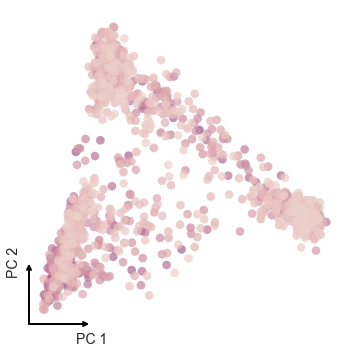

In [13]:
DR_plot(dim_name='PC').plot(retina.obsm['X_pca'], color=retina.obs['log1p_total_counts'])

Now perform same analysis on colon dataset

In [15]:
colon.X = colon.layers['arcsinh_norm'].copy()
sc.tl.pca(colon, use_highly_variable=False, n_comps=500)

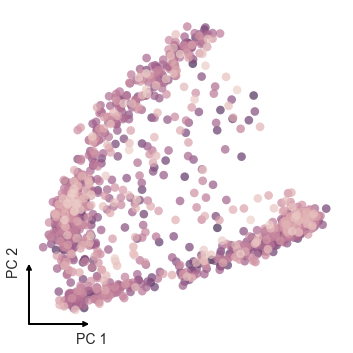

In [16]:
DR_plot(dim_name='PC').plot(colon.obsm['X_pca'], color=colon.obs['log1p_total_counts'])

---
## t-SNE
A workhorse technique for dimensionality reduction and visualization of scRNA-seq datasets, t-SNE performs a stochastic, non-linear transformation to project high-dimensional data into 2D in order to identify clustering and global structure.  
Here, we will plug arcsinh-normalized counts data directly into t-SNE and compare results to the original, feature-selected dataset.

In [17]:
retina_sel.X = retina_sel.layers['arcsinh_norm'].copy()
sc.tl.tsne(retina_sel, use_rep='X', perplexity=30, random_state=18)

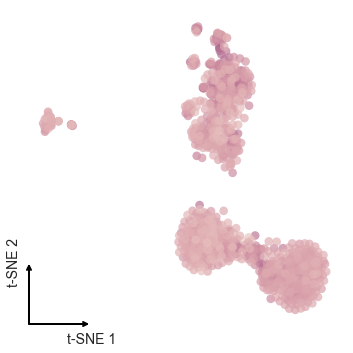

In [18]:
DR_plot(dim_name='t-SNE').plot(retina_sel.obsm['X_tsne'], color=retina_sel.obs['log1p_total_counts'])

In [19]:
sc.tl.tsne(retina, use_rep='X_pca', n_pcs=500, perplexity=30, random_state=18)

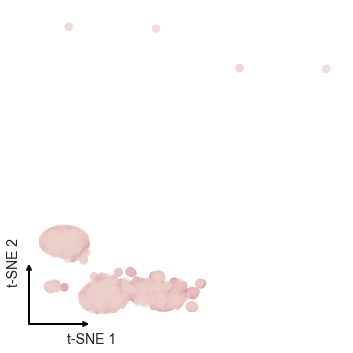

In [20]:
DR_plot(dim_name='t-SNE').plot(retina.obsm['X_tsne'], color=retina.obs['log1p_total_counts'])

Now perform same analysis on colon dataset

In [21]:
colon_sel.X = colon_sel.layers['arcsinh_norm'].copy()
sc.tl.tsne(colon_sel, use_rep='X', perplexity=30, random_state=18)

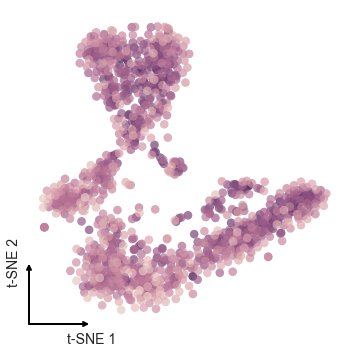

In [22]:
DR_plot(dim_name='t-SNE').plot(colon_sel.obsm['X_tsne'], color=colon_sel.obs['log1p_total_counts'])

In [23]:
sc.tl.tsne(colon, use_rep='X_pca', n_pcs=500, perplexity=30, random_state=18)

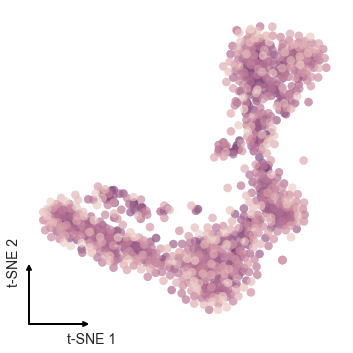

In [25]:
DR_plot(dim_name='t-SNE').plot(colon.obsm['X_tsne'], color=colon.obs['log1p_total_counts'])

---
## UMAP
Another popular method for low-dimensional projection of scRNA-seq datasets, UMAP creates high-dimensional manifolds that describe the structure of the dataset.  
Here, we will plug arcsinh-normalized counts data directly into UMAP and compare results to the original, feature-selected dataset.

In [26]:
sc.pp.neighbors(retina_sel, n_neighbors=30, use_rep='X', knn=True, random_state=18, metric='euclidean', copy=False)
sc.tl.umap(retina_sel, random_state=18)

/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/umap/umap_.py:328: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../.virtualenvs/lau_lab/lib/python3.6/site-packages/umap/umap_.py", line 446:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/numba/compiler.py:742: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../.virtualenvs/lau_lab/lib/python3.6/site-packages/umap/umap_.py", line 329:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/numba/compile

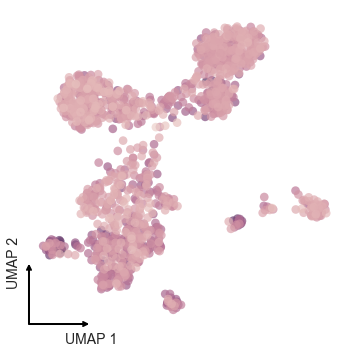

In [27]:
DR_plot(dim_name='UMAP').plot(retina_sel.obsm['X_umap'], color=retina_sel.obs['log1p_total_counts'])

In [28]:
sc.pp.neighbors(retina, n_neighbors=30, use_rep='X_pca', n_pcs=500, knn=True, random_state=18, metric='euclidean', copy=False)
sc.tl.umap(retina, random_state=18)

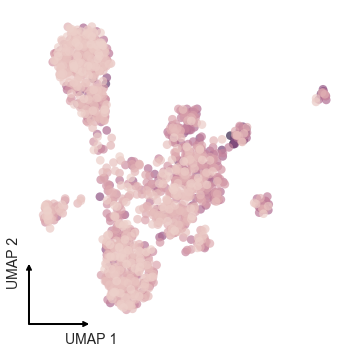

In [29]:
DR_plot(dim_name='UMAP').plot(retina.obsm['X_umap'], color=retina.obs['log1p_total_counts'])

Now perform same analysis on colon dataset

In [30]:
sc.pp.neighbors(colon_sel, n_neighbors=30, use_rep='X', knn=True, random_state=18, metric='euclidean', copy=False)
sc.tl.umap(colon_sel, random_state=18)

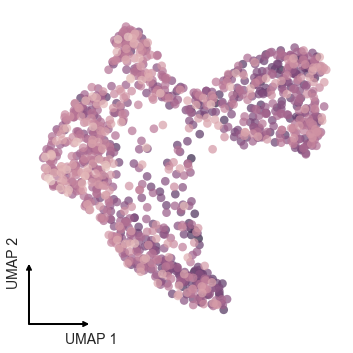

In [31]:
DR_plot(dim_name='UMAP').plot(colon_sel.obsm['X_umap'], color=colon_sel.obs['log1p_total_counts'])

In [32]:
sc.pp.neighbors(colon, n_neighbors=30, use_rep='X_pca', n_pcs=500, knn=True, random_state=18, metric='euclidean', copy=False)
sc.tl.umap(colon, random_state=18)

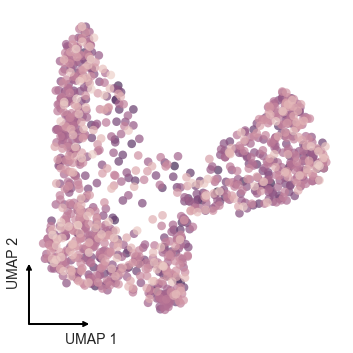

In [33]:
DR_plot(dim_name='UMAP').plot(colon.obsm['X_umap'], color=colon.obs['log1p_total_counts'])

---
We can test the Euclidean distance preservation as follows:

In [34]:
# choose value for K-nearest neighbor calculations. 
# We use 30 because that is the standard perplexity chosen for DR techniques here.
k = 30

In [36]:
# create dictionaries for dumping results into
final_distance_stats = {'Retina':{'R':{}, 'EMD':{}, 'Knn Pres.':{}}, 'Colon':{'R':{}, 'EMD':{}, 'Knn Pres.':{}}}

In [37]:
%time corr, EMD, knnP = structure_preservation_sc(retina_sel, latent='X_tsne', native='X', k=k)
final_distance_stats['Retina']['R']['t-SNE (sel.)'], final_distance_stats['Retina']['EMD']['t-SNE (sel.)'], final_distance_stats['Retina']['Knn Pres.']['t-SNE (sel.)'] = corr[0], EMD, knnP

Correlating distances
Normalizing unique distances
Calculating Earth-Mover's Distance between distributions
Determining nearest neighbor preservation

Done!
CPU times: user 365 ms, sys: 33.3 ms, total: 398 ms
Wall time: 513 ms


In [38]:
%time corr, EMD, knnP = structure_preservation_sc(retina, latent='X_tsne', native='X_pca', k=k)
final_distance_stats['Retina']['R']['t-SNE (PCA)'], final_distance_stats['Retina']['EMD']['t-SNE (PCA)'], final_distance_stats['Retina']['Knn Pres.']['t-SNE (PCA)'] = corr[0], EMD, knnP

Calculating unique distances for native space, X_pca
Calculating unique distances for latent space, X_tsne
Correlating distances
Normalizing unique distances
Calculating Earth-Mover's Distance between distributions
k-nearest neighbor calculation for X_pca
k-nearest neighbor calculation for X_tsne
Determining nearest neighbor preservation

Done!
CPU times: user 1.41 s, sys: 473 ms, total: 1.88 s
Wall time: 1.63 s


In [39]:
%time corr, EMD, knnP = structure_preservation_sc(retina_sel, latent='X_umap', native='X', k=k)
final_distance_stats['Retina']['R']['UMAP (sel.)'], final_distance_stats['Retina']['EMD']['UMAP (sel.)'], final_distance_stats['Retina']['Knn Pres.']['UMAP (sel.)'] = corr[0], EMD, knnP

Calculating unique distances for latent space, X_umap
Correlating distances
Normalizing unique distances
Calculating Earth-Mover's Distance between distributions
k-nearest neighbor calculation for X_umap
Determining nearest neighbor preservation

Done!
CPU times: user 637 ms, sys: 235 ms, total: 873 ms
Wall time: 795 ms


In [40]:
%time corr, EMD, knnP = structure_preservation_sc(retina, latent='X_umap', native='X_pca', k=k)
final_distance_stats['Retina']['R']['UMAP (PCA)'], final_distance_stats['Retina']['EMD']['UMAP (PCA)'], final_distance_stats['Retina']['Knn Pres.']['UMAP (PCA)'] = corr[0], EMD, knnP

Calculating unique distances for latent space, X_umap
Correlating distances
Normalizing unique distances
Calculating Earth-Mover's Distance between distributions
k-nearest neighbor calculation for X_umap
Determining nearest neighbor preservation

Done!
CPU times: user 650 ms, sys: 272 ms, total: 922 ms
Wall time: 731 ms


In [41]:
%time corr, EMD, knnP = structure_preservation_sc(colon_sel, latent='X_tsne', native='X', k=k)
final_distance_stats['Colon']['R']['t-SNE (sel.)'], final_distance_stats['Colon']['EMD']['t-SNE (sel.)'], final_distance_stats['Colon']['Knn Pres.']['t-SNE (sel.)'] = corr[0], EMD, knnP

Calculating unique distances for native space, X
Calculating unique distances for latent space, X_tsne
Correlating distances
Normalizing unique distances
Calculating Earth-Mover's Distance between distributions
k-nearest neighbor calculation for X
k-nearest neighbor calculation for X_tsne
Determining nearest neighbor preservation

Done!
CPU times: user 996 ms, sys: 406 ms, total: 1.4 s
Wall time: 1.25 s


In [42]:
%time corr, EMD, knnP = structure_preservation_sc(colon, latent='X_tsne', native='X_pca', k=k)
final_distance_stats['Colon']['R']['t-SNE (PCA)'], final_distance_stats['Colon']['EMD']['t-SNE (PCA)'], final_distance_stats['Colon']['Knn Pres.']['t-SNE (PCA)'] = corr[0], EMD, knnP

Calculating unique distances for native space, X_pca
Calculating unique distances for latent space, X_tsne
Correlating distances
Normalizing unique distances
Calculating Earth-Mover's Distance between distributions
k-nearest neighbor calculation for X_pca
k-nearest neighbor calculation for X_tsne
Determining nearest neighbor preservation

Done!
CPU times: user 1.16 s, sys: 452 ms, total: 1.62 s
Wall time: 1.46 s


In [43]:
%time corr, EMD, knnP = structure_preservation_sc(colon_sel, latent='X_umap', native='X', k=k)
final_distance_stats['Colon']['R']['UMAP (sel.)'], final_distance_stats['Colon']['EMD']['UMAP (sel.)'], final_distance_stats['Colon']['Knn Pres.']['UMAP (sel.)'] = corr[0], EMD, knnP

Calculating unique distances for latent space, X_umap
Correlating distances
Normalizing unique distances
Calculating Earth-Mover's Distance between distributions
k-nearest neighbor calculation for X_umap
Determining nearest neighbor preservation

Done!
CPU times: user 471 ms, sys: 275 ms, total: 746 ms
Wall time: 636 ms


In [44]:
%time corr, EMD, knnP = structure_preservation_sc(colon, latent='X_umap', native='X_pca', k=k)
final_distance_stats['Colon']['R']['UMAP (PCA)'], final_distance_stats['Colon']['EMD']['UMAP (PCA)'], final_distance_stats['Colon']['Knn Pres.']['UMAP (PCA)'] = corr[0], EMD, knnP

Calculating unique distances for latent space, X_umap
Correlating distances
Normalizing unique distances
Calculating Earth-Mover's Distance between distributions
k-nearest neighbor calculation for X_umap
Determining nearest neighbor preservation

Done!
CPU times: user 533 ms, sys: 196 ms, total: 729 ms
Wall time: 528 ms


---
### Summary Metrics

In [45]:
retina_sum = pd.DataFrame(final_distance_stats['Retina'])
retina_sum = retina_sum.sort_values(by='R')
retina_sum = retina_sum.reindex(['EMD','R','Knn Pres.'], axis=1)
#retina_sum.to_csv('retina_global_metrics.csv')

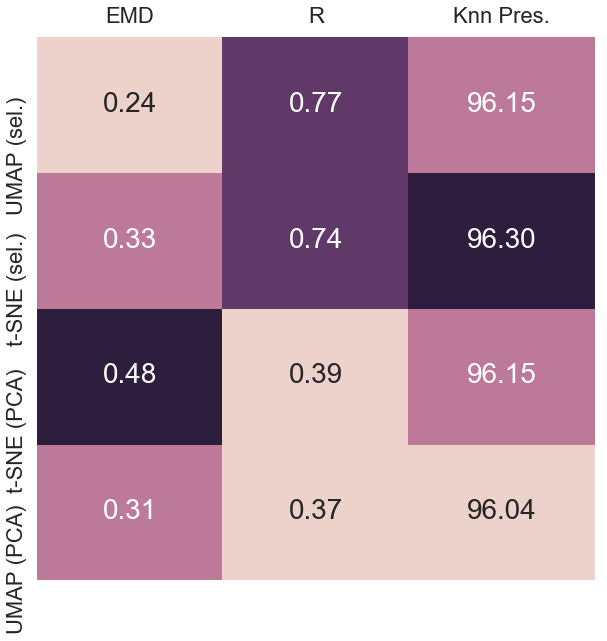

In [46]:
retina_norm=(retina_sum-retina_sum.mean())/retina_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
ax = sns.heatmap(retina_norm, annot=retina_sum, cmap=sns.cubehelix_palette(), robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(top=False)
#plt.savefig(fname='../images/retina_global_metrics.png', transparent=True, bbox_inches='tight')

In [47]:
colon_sum = pd.DataFrame(final_distance_stats['Colon'])
colon_sum = colon_sum.sort_values(by='R')
colon_sum = colon_sum.reindex(['EMD','R','Knn Pres.'], axis=1)
#colon_sum.to_csv('colon_global_metrics.csv')

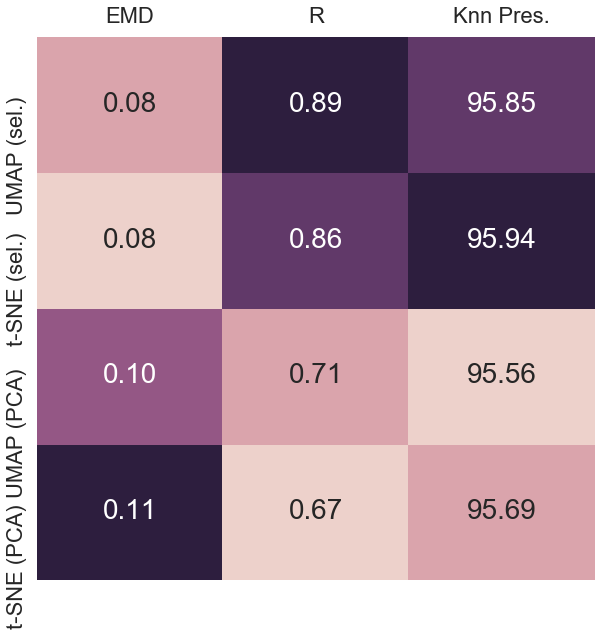

In [48]:
colon_norm=(colon_sum-colon_sum.mean())/colon_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
ax = sns.heatmap(colon_norm, annot=colon_sum, cmap=sns.cubehelix_palette(), robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(top=False)
#plt.savefig(fname='../images/colon_global_metrics.png', transparent=True, bbox_inches='tight')

In [50]:
colon_sum

,EMD,R,Knn Pres.
t-SNE (PCA),0.113742,0.673556,95.6854
UMAP (PCA),0.096324,0.712017,95.5590
t-SNE (sel.),0.081016,0.861776,95.9395
UMAP (sel.),0.083856,0.894232,95.8457


In [60]:
retina_sum.index.str.split(' ', expand=True)[[0]]

MultiIndex([('UMAP', '(PCA)')],
           )

In [61]:
retina_sum['DR'] = retina_sum.index

In [65]:
new = retina_sum['DR'].str.split(" ", expand=True)
retina_sum['DR'] = new[0]

In [67]:
retina_sum['Native'] = new[1]

In [68]:
retina_sum

,EMD,R,Knn Pres.,DR,Native
UMAP (PCA),0.313789,0.371190,96.0441,UMAP,(PCA)
t-SNE (PCA),0.482554,0.393041,96.1464,t-SNE,(PCA)
t-SNE (sel.),0.325749,0.742583,96.3002,t-SNE,(sel.)
UMAP (sel.),0.239733,0.772948,96.1543,UMAP,(sel.)


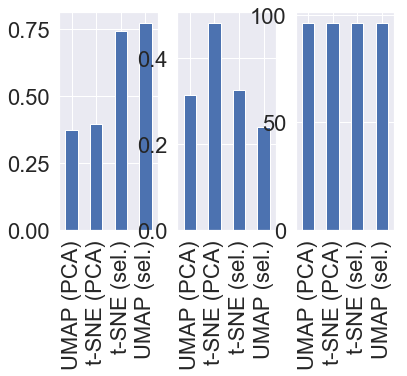

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=3)
plt.bar
retina_sum[['R']].plot(ax=axes[0],kind='bar', legend=False)
retina_sum[['EMD']].plot(ax=axes[1],kind='bar', legend=False)
retina_sum[['Knn Pres.']].plot(ax=axes[2],kind='bar', legend=False)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3)
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = retina_sum[['R']]
bars2 = retina_sum[['R']]
bars3 = retina_sum[['R']]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()
